## Testing `neg2pos` and `pos2neg`

In [19]:
import numpy as np

In [34]:
import os
data_path = r'C:\Users\jchen\Misc. Github Repositories\downloaded_code\Natural-Mouse-Movements-Neural-Networks\train\data.json'
os.chdir(r'C:\Users\jchen\ml_projects_active\ai_mouse_movements\python')
from pymouse.utils.data_loader import load_data
# list of dictionaries
(train_inputs, train_paths, train_time) = load_data(data_path)
print(len(train_inputs))

21417


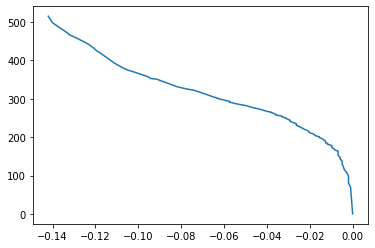

In [11]:
from pymouse.utils.plot import plot_paths
%matplotlib inline
plot_paths(train_paths[:1])

In [13]:
def neg2pos(coords, copy=False):
    """Converts the negative coords to positive.

    Args:
        coords (np.ndarray): (num_paths, path_count, 2 (or 3))

    Returns:
        coords (np.ndarray): (num_paths, path_count, 2 (or 3))
        neg_idx (tuple[np.ndarray]): indices where the original coords are
            negative
    """
    if copy:
        coords = np.copy(coords)
    neg_idx = np.where(coords < 0)
    coords[neg_idx] = coords[neg_idx] * -1
    return (coords, neg_idx)

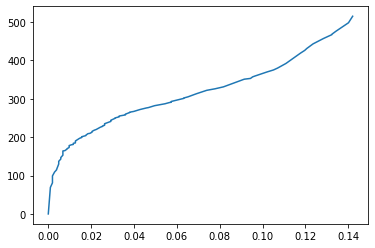

In [14]:
coords, neg_idx = neg2pos(train_paths, copy=True)
plot_paths(coords[:1])

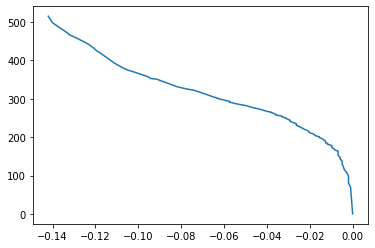

In [15]:
# original not affected!
plot_paths(train_paths[:1])

In [16]:
def pos2neg(coords, neg_idx):
    """Undos neg2pos.
    
    Args:
        coords (np.ndarray): (num_paths, path_count, 2 (or 3))
        neg_idx (tuple[np.ndarray]): indices where the original coords are
            negative
    
    Returns:
        coords (np.ndarray): (num_paths, path_count, 2 (or 3))
    """
    coords[neg_idx] = coords[neg_idx] * -1
    return coords

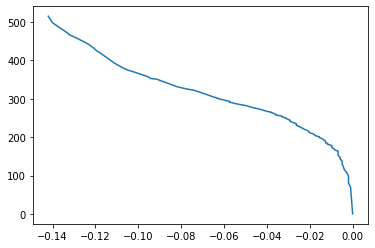

In [17]:
# back to negative!
coords = pos2neg(coords, neg_idx)
plot_paths(coords[:1])

## Testing scaling

In [45]:
import os
data_path = r'C:\Users\jchen\Misc. Github Repositories\downloaded_code\Natural-Mouse-Movements-Neural-Networks\train\data.json'
os.chdir(r'C:\Users\jchen\ml_projects_active\ai_mouse_movements\python')
from pymouse.utils.data_loader import load_data
# list of dictionaries
(train_inputs, train_paths, train_time) = load_data(data_path)
print(len(train_inputs))

21417


In [46]:
def scale_coords_all(coords, scale_range=[1924, 1924], stay_pos=False):
    """Scales the coords to match the destination's coords.

    Args:
        coords (np.ndarray): (num_paths, path_count, 2 (or 3))
            assumes that each coordinate path starts at (0, 0)
        dest (np.ndarray): the min and max of this array determine the range
            to scale the coords to. Assumes that dest hasa the shape
            (num_paths, 2 (or 3))
    
    Returns:
        coords (np.ndarray): scaled array, such that the maximum of each 
            dimenion (x, y) matches the destination for each path.
            (num_paths, path_count, 2 (or 3))
    """
    coords, neg_idx = neg2pos(coords, copy=True)

    x_scale_factor = scale_range[0] / coords[:, :, 0].max()
    y_scale_factor = scale_range[1] / coords[:, :, 1].max()

    print(f'X Scale Factor: {x_scale_factor}')
    print(f'Y Scale Factor: {y_scale_factor}')

    coords[:, :, 0] = coords[:, :, 0] * x_scale_factor
    coords[:, :, 1] = coords[:, :, 1] * y_scale_factor

    # convert back to negative
    if not stay_pos:
        coords = pos2neg(coords, neg_idx)

    return coords

In [47]:
train_inputs.shape

(21417, 2)

In [48]:
# we want the coords to be scaled within the [1924, 1924] range
coords = scale_coords_all(train_paths, scale_range=[1924, 1924], stay_pos=True)
coords.min(), coords.max()

X Scale Factor: 1749.090909090909
Y Scale Factor: 0.33513325204668176


(0.0, 1924.0)

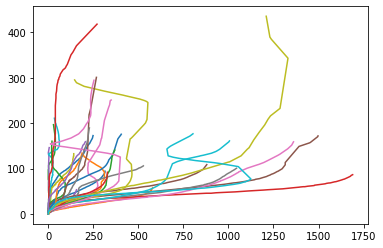

In [49]:
plot_paths(coords[:30])

In [50]:
# we want the coords to be scaled within the [1924, 1924] range
coords = scale_coords_all(train_paths, scale_range=[1924, 1924], stay_pos=False)
coords.min(), coords.max()

X Scale Factor: 1749.090909090909
Y Scale Factor: 0.33513325204668176


(-1924.0, 1924.0)

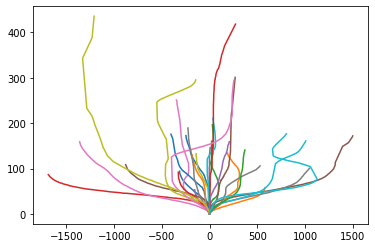

In [51]:
plot_paths(coords[:30])